In [1]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('Titanic/train.csv')
test = pd.read_csv('Titanic/test.csv')
submit = pd.read_csv('Titanic/gender_submission.csv')

In [3]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [4]:
import os
os.getcwd()

'C:\\Users\\asuss\\Anaconda3'

In [5]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
data = train.append(test)
data

C:\Users\asuss\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [11]:
data.reset_index(inplace=True, drop=True)

In [12]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


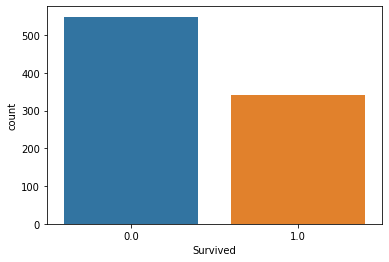

In [13]:
sns.countplot(data['Survived'])

In [14]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True)

Survived,0.0,1.0,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


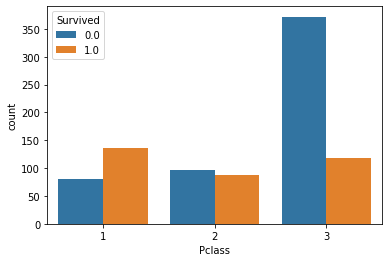

In [15]:
sns.countplot(data['Pclass'], hue=data['Survived'])

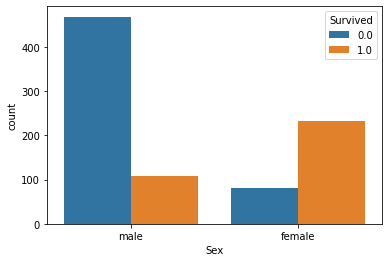

In [16]:
sns.countplot(data['Sex'], hue=data['Survived'])

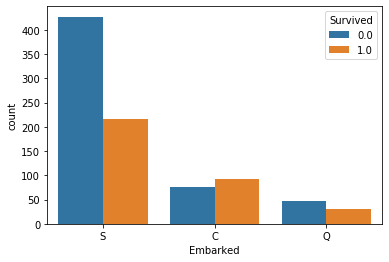

In [17]:
sns.countplot(data['Embarked'], hue=data['Survived'])

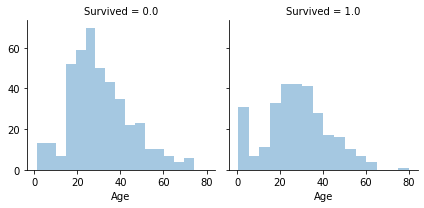

In [18]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

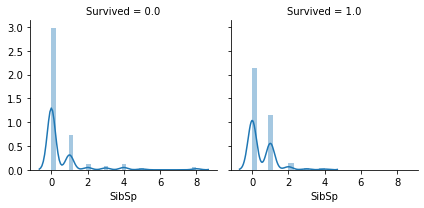

In [19]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp')

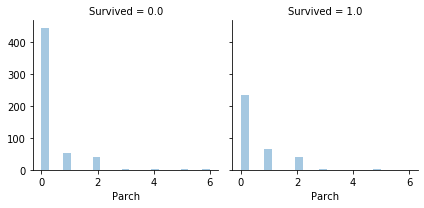

In [20]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

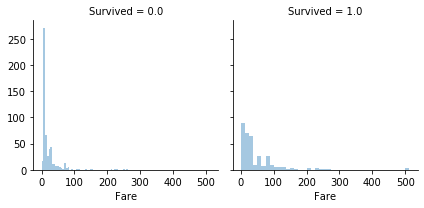

In [21]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

In [22]:
data['Family_size'] = data['Parch'] + data['SibSp']

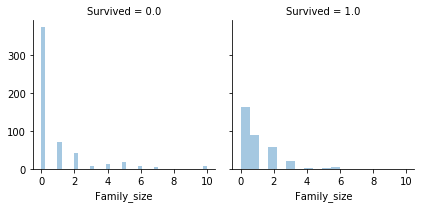

In [23]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_size', kde=False)

In [24]:
data['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [25]:
data['Name'].str.split(",", expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [26]:
data['Title1'] = data['Name'].str.split(",", expand=True)[1]

In [27]:

data['Title1'].head(3)

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
Name: Title1, dtype: object

In [28]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]

In [29]:
data['Title1'].head(3)

0       Mr
1      Mrs
2     Miss
Name: Title1, dtype: object

In [30]:
np.array(data['Title1'])#Title1前有空格 會影響Title2的replace 要先把series字串化.str再去前後空格.strip

array([' Mr', ' Mrs', ' Miss', ..., ' Mr', ' Mr', ' Master'], dtype=object)

In [31]:
data['Title1'] = data['Title1'].str.strip()#不可只打 data['Title1'].str.strip() 要有把舊data['Title1']放入新 data['Title1']的動作

In [32]:
data['Title1']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
5           Mr
6           Mr
7       Master
8          Mrs
9          Mrs
10        Miss
11        Miss
12          Mr
13          Mr
14        Miss
15         Mrs
16      Master
17          Mr
18         Mrs
19         Mrs
20          Mr
21          Mr
22        Miss
23          Mr
24        Miss
25         Mrs
26          Mr
27          Mr
28        Miss
29          Mr
         ...  
1279        Mr
1280    Master
1281        Mr
1282       Mrs
1283    Master
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288       Mrs
1289        Mr
1290        Mr
1291      Miss
1292        Mr
1293      Miss
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299      Miss
1300      Miss
1301      Miss
1302       Mrs
1303      Miss
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title1, Length: 1309, dtype: object

In [33]:
data['Title1'].unique()#已去空格

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [34]:
pd.crosstab(data['Title1'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [35]:
pd.crosstab(data['Title1'], data['Sex']).style.background_gradient(cmap='summer_r')

Sex,female,male
Title1,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [36]:
pd.crosstab(data['Sex'], data['Title1']).style.background_gradient(cmap='summer_r')#pd.crosstab(idx, col) #background漸層是以col來漸變

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [37]:
pd.crosstab(data['Survived'], data['Title1']).style.background_gradient(cmap='summer_r')#很多稱謂人數少 合併為mr mrs miss master

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [38]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [39]:
data.groupby(['Title1', 'Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [40]:
data['Title2'] = data['Title1'].replace(['Mlle', 'Mme', 'Ms','Dr', 'Major', 'Lady', 'the Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                                       ['Miss', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs'])

In [41]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [42]:
data.groupby('Title2')['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [43]:
pd.crosstab(data['Title2'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [44]:
pd.crosstab(data['Title2'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


In [45]:
data['Ticket']

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
5                   330877
6                    17463
7                   349909
8                   347742
9                   237736
10                 PP 9549
11                  113783
12               A/5. 2151
13                  347082
14                  350406
15                  248706
16                  382652
17                  244373
18                  345763
19                    2649
20                  239865
21                  248698
22                  330923
23                  113788
24                  349909
25                  347077
26                    2631
27                   19950
28                  330959
29                  349216
               ...        
1279                364858
1280                349909
1281                 12749
1282              PC 17592
1283             C.A. 2673
1284            C.A. 30769
1

In [46]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [47]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

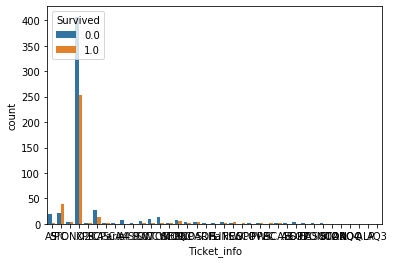

In [48]:
sns.countplot(data['Ticket_info'], hue=data['Survived'])

In [49]:
pd.crosstab(data['Ticket_info'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Ticket_info,A4,A5,AS,C,CA,CASOTON,FC,FCC,Fa,LINE,PC,PP,PPP,SC,SCA4,SCAH,SCOW,SCPARIS,SCParis,SOC,SOP,SOPP,SOTONO2,SOTONOQ,SP,STONO,STONO2,SWPP,WC,WEP,X
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,7,19,1,3,27,1,1,1,1,3,21,1,1,0,1,1,1,4,2,5,1,3,2,13,1,7,3,0,9,2,407
1.0,0,2,0,2,14,0,0,4,0,1,39,2,1,1,0,2,0,3,2,1,0,0,0,2,0,5,3,2,1,1,254


In [50]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [51]:
data['Cabin'] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin') #補空值為'NoCabin'

In [52]:
data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

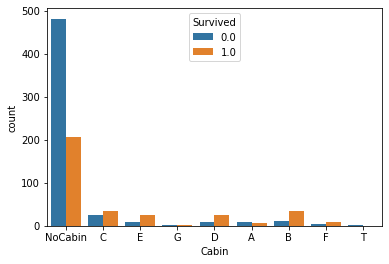

In [53]:
sns.countplot(data['Cabin'], hue=data['Survived']) #房號英文的生存率高 也許票價也高 大多數資料沒有房號

In [54]:
data.info() #分析完所有特徵 要來找補空 空值:age embarked fare survived cabin已補

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


In [55]:
data['Embarked'].mode()

0    S
dtype: object

In [56]:
data['Embarked'] = data['Embarked'].fillna('S') #只缺2 補上港口眾數

In [57]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean()) #只缺1 補上平均票價

In [58]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


In [59]:
#進行ML MODEL前要將特徵轉成數字 再將數字投影到空間中 找出一平面做切割 #非數字特徵:cabin embarked title1 title2 pclass sex ticket_info

In [60]:
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [61]:
#年齡缺值多 且影響因素多 用隨機森林來推算 先用年齡非空值且去Outlier的資料train model Outlier:fare family_size

In [62]:
dataAgeNull = data[data['Age'].isnull()]
dataAgeNotNull = data[data['Age'].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull['Fare']-dataAgeNotNull['Fare'].mean()) < (3*dataAgeNotNull['Fare'].std())) |
                                (np.abs(dataAgeNotNull['Family_size']-dataAgeNotNull['Family_size'].mean()) < (3*dataAgeNotNull['Family_size'].std()))]
rfModel_Age = RandomForestRegressor(n_estimators=2000, random_state=42) #呼叫隨機森林model
ageColumns = ['Cabin', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_size', 'Title1', 'Title2', 'Ticket_info'] #預測年齡有用的特徵
rfModel_Age.fit(remove_outlier[ageColumns], remove_outlier['Age']) #train model:x為去空值去離群值且有用的特徵 y為去空值去離群值的年齡

ageNullValues = rfModel_Age.predict(X = dataAgeNull[ageColumns]) #test:用年齡為空值的資料中有用的特徵作為x 去預測y 未知的年齡空值的年齡
dataAgeNull.loc[:,'Age'] = ageNullValues #將預測結果放入年齡空值的col
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

C:\Users\asuss\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [63]:
data.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_size,Title1,Title2,Ticket_info
0,29.155289,7,1,8.4583,"Moran, Mr. James",0,6,2,1,0,0.0,330877,0,12,2,36
1,32.713584,7,2,13.0000,"Williams, Mr. Charles Eugene",0,18,1,1,0,1.0,244373,0,12,2,36
2,39.521614,7,0,7.2250,"Masselmani, Mrs. Fatima",0,20,2,0,0,1.0,2649,0,13,3,36
3,27.390812,7,0,7.2250,"Emir, Mr. Farred Chehab",0,27,2,1,0,0.0,2631,0,12,2,36
4,21.500371,7,1,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,2,0,0,1.0,330959,0,9,1,36
5,27.420549,7,2,7.8958,"Todoroff, Mr. Lalio",0,30,2,1,0,0.0,349216,0,12,2,36
6,45.889750,1,0,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,0,0,1,1.0,PC 17569,1,13,3,14
7,26.117062,7,1,7.7500,"Glynn, Miss. Mary Agatha",0,33,2,0,0,1.0,335677,0,9,1,36
8,23.747022,7,0,7.2292,"Mamee, Mr. Hanna",0,37,2,1,0,1.0,2677,0,12,2,36
9,32.051347,7,0,7.8958,"Kraeff, Mr. Theodor",0,43,2,1,0,0.0,349253,0,12,2,36


In [64]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=['PassengerId'])
dataTest = data[-pd.notnull(data['Survived'])].sort_values(by=['PassengerId']) #拆成訓練/測試

In [65]:
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [66]:
dataTrain = dataTrain[['Survived', 'Age', 'Cabin', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_size', 'Title2', 'Ticket_info']]
dataTest = dataTest[['Age', 'Cabin', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_size', 'Title2', 'Ticket_info']]
dataTrain.head(10)

,Survived,Age,Cabin,Embarked,Fare,Pclass,Sex,Family_size,Title2,Ticket_info
263,0.0,22.000000,7,2,7.2500,2,1,1,2,2
264,1.0,38.000000,2,0,71.2833,0,0,1,3,14
265,1.0,26.000000,7,2,7.9250,2,0,0,1,31
266,1.0,35.000000,2,2,53.1000,0,0,1,3,36
267,0.0,35.000000,7,2,8.0500,2,1,0,2,36
0,0.0,29.155289,7,1,8.4583,2,1,0,2,36
268,0.0,54.000000,4,2,51.8625,0,1,0,2,36
269,0.0,2.000000,7,2,21.0750,2,1,4,0,36
270,1.0,27.000000,7,2,11.1333,2,0,2,3,36
271,1.0,14.000000,7,0,30.0708,1,0,1,3,36


In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                           n_estimators=1000,
                            min_samples_split=12,
                           min_samples_leaf=1,
                           oob_score=True,
                           random_state=1,
                           n_jobs=-1)
rf.fit(dataTrain.iloc[:,1:], dataTrain.iloc[:,0])
print('%.4f' % rf.oob_score_)

0.8339


In [68]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [70]:
rf_res = rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('Titanic_rf_predict.csv', index=False)